In [1]:
%load_ext autoreload
%autoreload 2


import sys
import healpy as hp
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
import glob
from astropy.table import vstack,Table,join
from fa_tools import fa_plot
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from   desitarget.sv3.sv3_targetmask import desi_mask, bgs_mask, mws_mask, scnd_mask
import pylab as pl
import S4Mock_io

In [19]:
ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

Requested fieldrot=223.9 arcsec delta=0.0 arcsec
Requested fieldrot=223.9 arcsec delta=0.0 arcsec


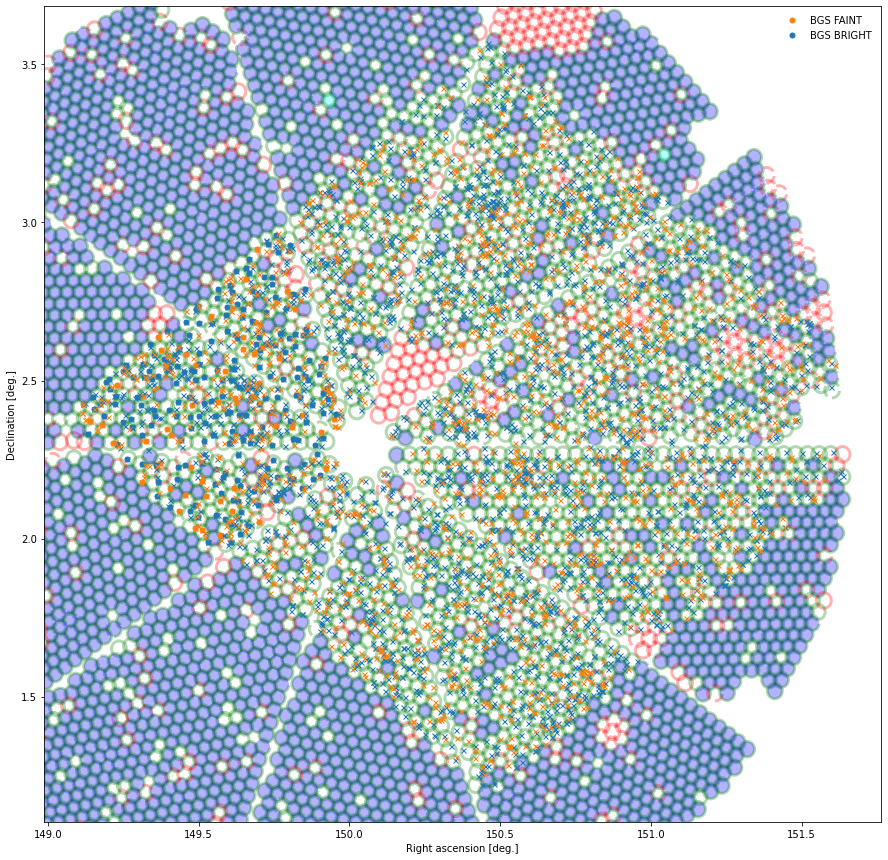

<Figure size 432x288 with 0 Axes>

In [20]:
fa_plot('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000012.fits',ledger)

In [22]:
p = fits.open('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000012.fits')
fassign = p['FASSIGN'].data
favail = p['FAVAIL'].data
ftargs = p['FTARGETS'].data

In [45]:
#target files produced by fiberassign
targs = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/*-targ.fits')])

In [47]:
#target files produced by fiberassign
fbas = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-*.fits')])

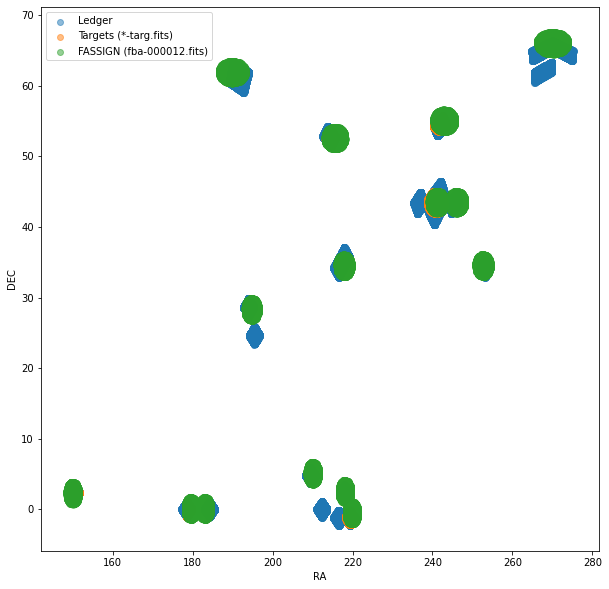

In [49]:
plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fbas['TARGET_RA'],fbas['TARGET_DEC'],label='FASSIGN (fba-000012.fits)', alpha=0.5)
#plt.scatter(favail['RA'],favail['DEC'])

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

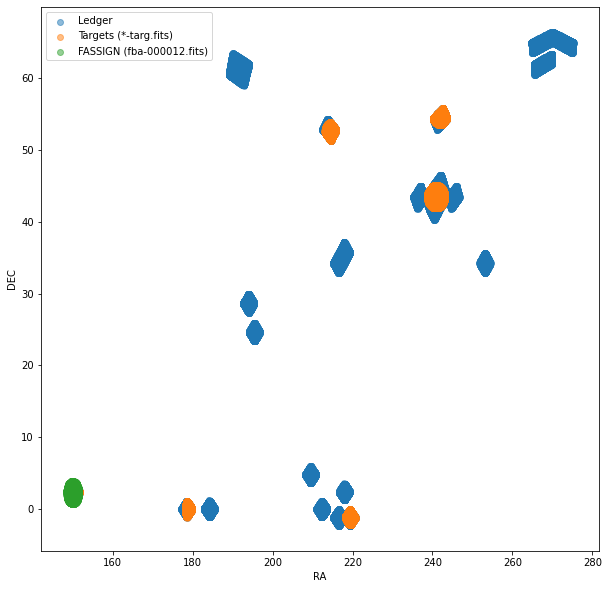

In [54]:
#same but for one fba file

plt.figure(figsize=(10,10))


#plt.scatter(ftargs['TARGET_RA'],ftargs['TARGET_DEC'],label='FTARGETS (fba-000012.fits)', alpha=0.5)
plt.scatter(ledger['RA'],ledger['DEC'],label='Ledger', alpha=0.5)
plt.scatter(targs['RA'],targs['DEC'],label='Targets (*-targ.fits)', alpha=0.5)
plt.scatter(fassign['TARGET_RA'],fassign['TARGET_DEC'],label='FASSIGN (fba-000012.fits)', alpha=0.5)

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(170,190)
#plt.ylim(-5,5)
plt.legend()

In [77]:
"""
fba       = join(fassign,  ledger, keys='TARGETID', join_type='left')
favl      = join(favail, ledger, keys='TARGETID', join_type='left')
"""

In [27]:
#checking same hp for tiles and ledger
from S4Mock_io import read_sv3tiles
tiles = read_sv3tiles()
hps       = geometry.radec2pix(tiles, unique=True, nside=32)
print(hps.data)

from geometry import radec2pix
pix = radec2pix(ledger)
np.unique(pix).data

array([2335, 2455, 2457, 2459, 2460, 2462, 2480, 2538, 2551, 2559, 2600,
       2628, 2629, 2806, 2807, 2856, 3839, 6483, 6488, 6494, 6501, 6522,
       6569, 6741, 6814, 7029])

In [42]:
#checking whether fassign etc is in ledger
np.mean(np.in1d(fassign['TARGETID'],ledger['TARGETID']))
np.mean(np.in1d(favail['TARGETID'],ledger['TARGETID']))

0.03385196799742693

In [86]:
#shows how to load a zbest file 
x = np.loadtxt('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210408/zbest-20210408.txt')
Table(x)

col0,col1,col2,col3,col4,col5,col6
float64,float64,float64,float64,float64,float64,float64
149.59182739257812,2.70736026763916,1.0,10.0,-1.0,0.0,14.0
150.5951690673828,2.487602472305298,2.8823040473169926e+17,1.0,-1.0,0.0,14.0
151.23558044433594,2.8961873054504395,2.882304047316993e+17,1.0,-1.0,0.0,14.0
151.24766540527344,2.8385677337646484,2.882304047316993e+17,1.0,-1.0,0.0,14.0
150.19400024414062,1.7814902067184448,2.882304047316993e+17,1.0,-1.0,0.0,14.0
151.12876892089844,2.5124478340148926,2.882304047316993e+17,1.0,-1.0,0.0,14.0
149.32086181640625,2.2322099208831787,2.882304047316993e+17,1.0,-1.0,0.0,14.0
150.12542724609375,3.0265586376190186,2.882304047316993e+17,1.0,-1.0,0.0,14.0
149.8722686767578,2.491215467453003,2.882304047316993e+17,1.0,-1.0,0.0,14.0


In [116]:
#target files and ledger are all good 
np.mean(np.in1d(targs['TARGETID'],ledger['TARGETID']))

1.0

In [144]:
#shows we want nside 16
from desitarget.geomask import is_in_hp, nside2nside, pixarea2nside
pixarea2nside(7.)

In [16]:
#sv3 hp we should have if nside =32
import geometry
tiles = S4Mock_io.read_sv3tiles()
x =geometry.radec2pix(tiles, nside=32, unique=True)
x.data

array([2335, 2455, 2457, 2459, 2460, 2462, 2480, 2538, 2551, 2559, 2600,
       2628, 2629, 2806, 2807, 2856, 3839, 6483, 6488, 6494, 6501, 6522,
       6569, 6741, 6814, 7029])

In [66]:
from desimodel.footprint import is_point_in_desi, tiles2pix
from desitarget.geomask import pixarea2nside

#read targets in 
#get tiles
tiles = S4Mock_io.read_sv3tiles()
# closest nside to DESI tile area of ~7 deg
nside = pixarea2nside(7.)
# ADM determine the pixels that touch the tiles.
pixlist = tiles2pix(nside, tiles=tiles)
#read in mxxl
mxxl =S4Mock_io.read_mxxl(small=False,nside=nside)
#read in our mxxl targets but having this nside and this pixlist 
targets = mxxl[np.in1d(mxxl['HPX'],pixlist)]
#restrict only to targets in the requested tiles...
ii = is_point_in_desi(tiles, targets["RA"], targets["DEC"])
targets = targets[ii]
#now get pixlist in nside=32
pix32 = geometry.radec2pix(targets,nside=32)
targets['HPX']=pix32

In [69]:
geometry.radec2pix(targets,nside=32,unique=True).data

array([2286, 2287, 2333, 2334, 2335, 2356, 2357, 2376, 2378, 2400, 2447,
       2453, 2454, 2455, 2457, 2458, 2459, 2460, 2461, 2462, 2469, 2471,
       2480, 2481, 2482, 2483, 2484, 2495, 2496, 2498, 2504, 2536, 2537,
       2538, 2539, 2549, 2551, 2557, 2559, 2592, 2594, 2595, 2600, 2601,
       2602, 2628, 2629, 2630, 2631, 2679, 2685, 2803, 2806, 2807, 2809,
       2812, 2813, 2837, 2850, 2851, 2856, 2857, 2880, 2881, 2901, 2903,
       2978, 2984, 3834, 3835, 3838, 3839, 4010, 4011, 6398, 6399, 6477,
       6478, 6479, 6481, 6482, 6483, 6484, 6486, 6488, 6489, 6490, 6491,
       6492, 6493, 6494, 6495, 6500, 6501, 6503, 6509, 6511, 6512, 6513,
       6516, 6517, 6520, 6521, 6522, 6523, 6562, 6563, 6568, 6569, 6570,
       6571, 6572, 6574, 6608, 6609, 6740, 6741, 6743, 6809, 6811, 6812,
       6814, 6815, 6833, 6836, 6837, 6912, 6914, 7006, 7007, 7028, 7029,
       7030, 7031, 7037])

In [67]:
targets

RA,DEC,Z_OBS,APP_MAG,HPX
float32,float32,float32,float32,int64
179.61163,-0.33617753,0.5599181,20.548176,6399
179.85474,-1.5106196,0.2968929,18.418627,6399
179.83194,-1.5648836,0.29781306,19.851929,6399
179.48398,-1.1848173,0.30680206,20.015135,6399
179.7205,-0.0670469,0.29291224,19.977797,6741
178.14868,-0.12109245,0.21867615,19.15188,6741
178.30345,-0.21793036,0.21855608,18.71578,6741
179.21582,-0.007282362,0.20712528,20.136719,6741
179.05876,-0.70307785,0.29293805,19.690577,6741


In [61]:
import mock_ledger

In [74]:
p = mock_ledger.create_mock_ledger_hp(outdir=None, healpix=6399, mxxl=targets, overwrite=False)

Selected 0.305 as BGS Bright
Check: 0.039


In [75]:
p

RA,DEC,PARALLAX,PMRA,PMDEC,REF_EPOCH,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,TARGETID,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,PRIORITY,NUMOBS,NUMOBS_MORE,Z,ZWARN,TIMESTAMP,VERSION,TARGET_STATE,ZTILEID,SV3_SCND_TARGET
float64,float64,float32,float32,float32,float32,int64,int64,int64,int64,float64,int32,int64,int64,int64,int64,int64,float64,int64,str25,str14,str30,int32,int64
179.61163330078125,-0.3361775279045105,0.0,0.0,0.0,0.0,0,0,0,288230402991063040,0.3632081174370996,516,-99,3,-99,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
179.854736328125,-1.5106196403503418,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230402991063041,0.6828265286999671,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
179.83193969726562,-1.5648835897445679,0.0,0.0,0.0,0.0,1152921504606846976,257,0,288230402991063042,0.8458644942360125,516,102000,3,102000,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
179.48397827148438,-1.1848173141479492,0.0,0.0,0.0,0.0,0,0,0,288230402991063043,0.5022322378676639,516,-99,3,-99,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
179.5703887939453,-0.9932286739349365,0.0,0.0,0.0,0.0,0,0,0,288230402991063044,0.8833387666342022,516,-99,3,-99,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
179.06321716308594,-1.0636838674545288,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230402991063045,0.6320569236053598,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
178.8638458251953,-1.2311815023422241,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230402991063046,0.15652402098595364,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
178.8242950439453,-1.3023297786712646,0.0,0.0,0.0,0.0,0,0,0,288230402991063047,0.9443648217924323,516,-99,3,-99,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0
179.33932495117188,-0.565762460231781,0.0,0.0,0.0,0.0,1152921504606846976,514,0,288230402991063048,0.3171950494579491,516,102100,3,102100,0,3,-1.0,-1,2021-04-04T23:05:09,0.57.0,BGS|UNOBS,-1,0


In [76]:
geometry.radec2pix(p,unique=True)

6399
